In [1]:
%matplotlib inline

import os

from downloader import download_data, extract_data

url = 'http://ufldl.stanford.edu/housenumbers/'
data_folder = 'data/'

if not os.path.exists(data_folder):
    os.makedirs(data_folder)

train_filename = download_data('train.tar.gz', url, 404141560)
test_filename = download_data('test.tar.gz', url, 276555967)
extra_filename = download_data('extra.tar.gz', url, 1955489752)

cropped_train_filename = download_data('train_32x32.mat', url, 182040794)
cropped_test_filename = download_data('test_32x32.mat', url, 64275384)
cropped_extra_filename = download_data('extra_32x32.mat', url, 1329278602)

train_folder = extract_data('train.tar.gz')
test_folder = extract_data('test.tar.gz')
extra_folder = extract_data('extra.tar.gz')

('Found and verified', 'data/train.tar.gz')
('Found and verified', 'data/test.tar.gz')
('Found and verified', 'data/extra.tar.gz')
('Found and verified', 'data/train_32x32.mat')
('Found and verified', 'data/test_32x32.mat')
('Found and verified', 'data/extra_32x32.mat')
Extracting data for data/train. This may take a while. Please wait.
Extracting data for data/test. This may take a while. Please wait.
Extracting data for data/extra. This may take a while. Please wait.


Samples from training dataset


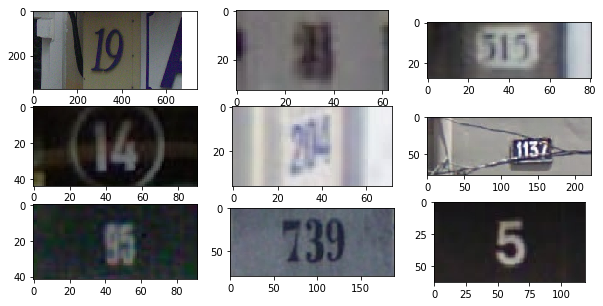

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

print("Samples from training dataset")

img1 = Image.open(train_folder + '/1.png', 'r')
img2 = Image.open(train_folder + '/11.png', 'r')
img3 = Image.open(train_folder + '/22.png', 'r')
img4 = Image.open(train_folder + '/33.png', 'r')
img5 = Image.open(train_folder + '/44.png', 'r')
img6 = Image.open(train_folder + '/55.png', 'r')
img7 = Image.open(train_folder + '/66.png', 'r')
img8 = Image.open(train_folder + '/77.png', 'r')
img9 = Image.open(train_folder + '/88.png', 'r')

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,5))
ax1.imshow(img1)
ax2.imshow(img2)
ax3.imshow(img3)
ax4.imshow(img4)
ax5.imshow(img5)
ax6.imshow(img6)
ax7.imshow(img7)
ax8.imshow(img8)
ax9.imshow(img9)
plt.show()

Samples from cropped training dataset


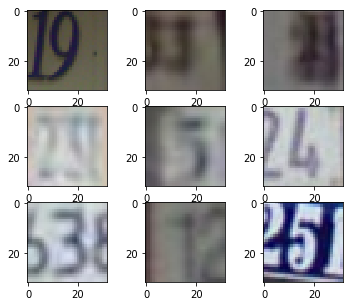

In [9]:
import scipy.io

print("Samples from cropped training dataset")

cropped_train_data = scipy.io.loadmat(cropped_train_filename)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(6,5))
ax1.imshow(cropped_train_data['X'][:,:,:,1])
ax2.imshow(cropped_train_data['X'][:,:,:,11])
ax3.imshow(cropped_train_data['X'][:,:,:,22])
ax4.imshow(cropped_train_data['X'][:,:,:,33])
ax5.imshow(cropped_train_data['X'][:,:,:,44])
ax6.imshow(cropped_train_data['X'][:,:,:,55])
ax7.imshow(cropped_train_data['X'][:,:,:,66])
ax8.imshow(cropped_train_data['X'][:,:,:,77])
ax9.imshow(cropped_train_data['X'][:,:,:,88])
plt.show()

In [14]:
import numpy as np,h5py
import pandas as pd

f = h5py.File(train_folder + '/digitStruct.mat','r')
train_data_boxes = f.get('digitStruct/bbox')
print(list(f[train_data_boxes[0][0]].keys()))
print(f[f[train_data_boxes[0][0]]['height'][0][0]][0][0])
print(f[f[train_data_boxes[0][0]]['width'][0][0]][0][0])

[u'height', u'label', u'left', u'top', u'width']
219.0
81.0


In [15]:
box_heights = []
box_widths = []
for b in train_data_boxes:
    b = f[b[0]]
    for height in b['height']:
        height = height[0]
        if not isinstance(height, float):
            height = f[height][0][0]
        box_heights.append(height)
    for width in b['width']:
        width = width[0]
        if not isinstance(width, float):
            width = f[width][0][0]
        box_widths.append(width)
box_dims = pd.DataFrame({ 'width': box_widths, 'height': box_heights })
box_dims.head()

,height,width
0,219.0,81.0
1,219.0,96.0
2,32.0,23.0
3,32.0,26.0
4,15.0,8.0


In [16]:
box_dims.describe()

,height,width
count,73257.000000,73257.000000
mean,33.861310,16.650491
std,18.601294,10.681429
min,9.000000,1.000000
25%,21.000000,10.000000
50%,29.000000,14.000000
75%,41.000000,21.000000
max,403.000000,207.000000


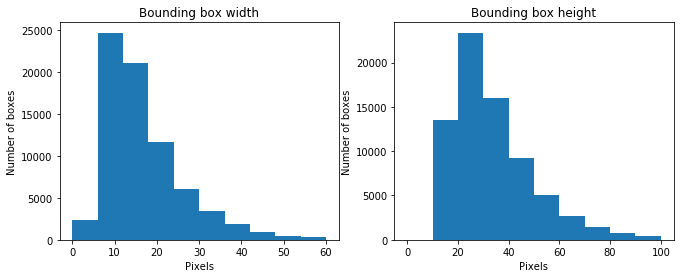

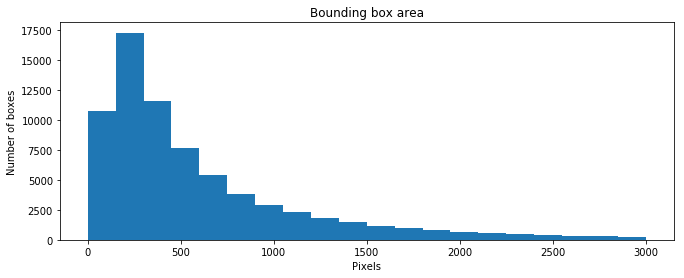

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.hist(box_dims['width'], range=[0, 60])
ax1.set_title('Bounding box width')
ax1.set_xlabel('Pixels')
ax1.set_ylabel('Number of boxes')
ax2.hist(box_dims['height'], range=[0, 100])
ax2.set_title('Bounding box height')
ax2.set_xlabel('Pixels')
ax2.set_ylabel('Number of boxes')
plt.show()

fig, (ax1) = plt.subplots(1, 1, figsize=(11,4))
ax1.hist(box_dims['width'] * box_dims['height'], range=[0, 3000], bins=20)
ax1.set_title('Bounding box area')
ax1.set_xlabel('Pixels')
ax1.set_ylabel('Number of boxes')
plt.show()